# Image Filtering - Spatial Filtering


In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


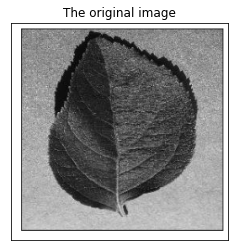

In [16]:
ref = cv2.imread('/content/drive/MyDrive/0a285c8b-1c31-48d4-89f2-af8b9edc36f6___RS_HL 5759.JPG')
plt.imshow(ref), plt.grid(False)

# while learning how to perform spatial filtering,
# you can also note how to apply different python commands.
plt.title('The original image')
plt.xticks([])
plt.yticks([])
plt.show()

## 1-Averaging filter


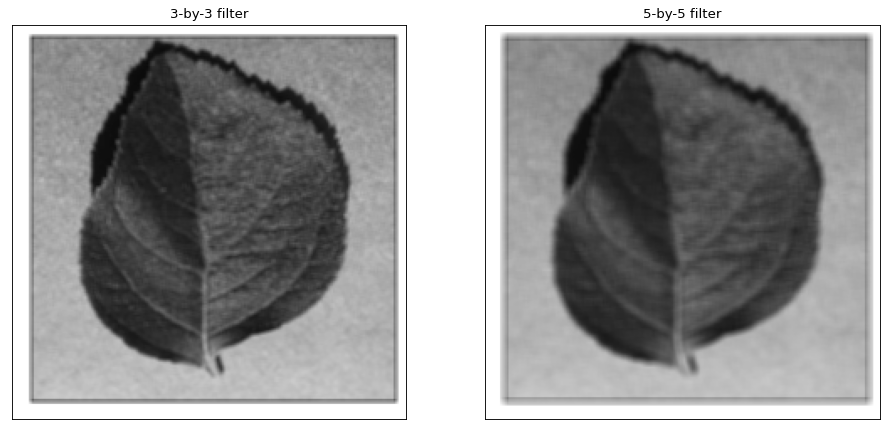

In [17]:
# Defining a kernel using numpy.
kernel_5 = np.ones((5,5),np.float32)/25
kernel_3 = np.ones((3,3),np.float32)/9

# Convolves an image with the kernel.
# -1 means that the center of the kernel is located on the center pixel.
# compare two kernel sizes.
filtered_5 = cv2.filter2D(ref,-1,kernel_5)
filtered_3 = cv2.filter2D(ref,-1,kernel_3)

# plot the results in two subplots.
fig=plt.figure(figsize=(14, 14), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(121), plt.imshow(filtered_3), plt.title('3-by-3 filter')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.subplot(122), plt.imshow(filtered_5), plt.title('5-by-5 filter')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.show()

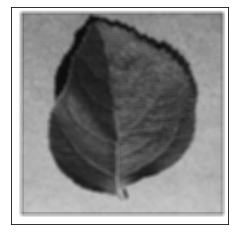

(<matplotlib.image.AxesImage at 0x7f23492f2290>,
 None,
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>),
 None)

In [18]:
# you can check the docs for further information.
blurred = cv2.blur(ref, (5, 5), -1)

plt.imshow(blurred), plt.grid(False), plt.xticks([]), plt.yticks([]), plt.show()

## 2-Padding

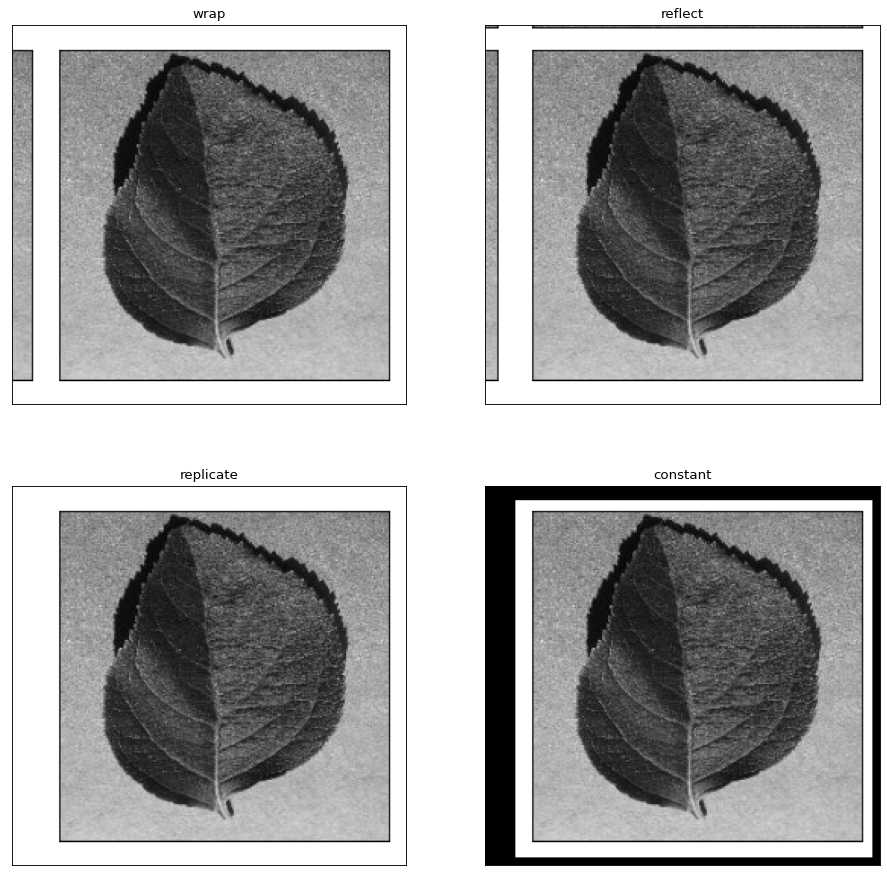

In [19]:
top = 10; bottom = 5; left = 20; right = 5
const = 100
img2 = cv2.copyMakeBorder(ref, top, bottom, left, right, 
                          cv2.BORDER_WRAP)
img3 = cv2.copyMakeBorder(ref, top, bottom, left, right, 
                          cv2.BORDER_REFLECT)
img4 = cv2.copyMakeBorder(ref, top, bottom, left, right, 
                          cv2.BORDER_REPLICATE)
img5 = cv2.copyMakeBorder(ref, top, bottom, left, right, 
                          cv2.BORDER_CONSTANT, const)

# Display the images
fig=plt.figure(figsize=(14, 14), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(221), plt.imshow(img2), plt.grid(False)
plt.xticks([]), plt.yticks([]), plt.title('wrap')

plt.subplot(222), plt.imshow(img3), plt.grid(False)
plt.xticks([]), plt.yticks([]), plt.title('reflect')

plt.subplot(223), plt.imshow(img4), plt.grid(False)
plt.xticks([]), plt.yticks([]), plt.title('replicate')

plt.subplot(224), plt.imshow(img5), plt.grid(False)
plt.xticks([]), plt.yticks([]), plt.title('constant')

plt.show()

## 3-User-defined kernels



(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

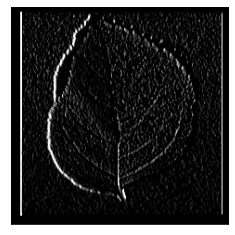

In [20]:
# vertical gradient kernel
# define a random kernel
vertical_gd = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])

# apply it.
filter_v = cv2.filter2D(ref[:, :, 2], -1, vertical_gd)

# show in a different colormap.
plt.imshow(filter_v, cmap='gray'), plt.grid(False)
plt.xticks([]), plt.yticks([])

## 4-Median filtering

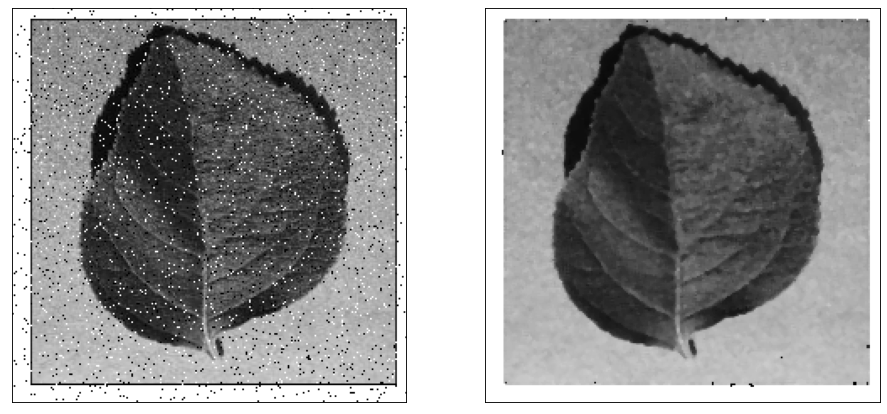

In [21]:
s_and_p = np.random.rand(ref.shape[0], ref.shape[1])

# if we consider 5% salt and pepper noise, we'd like to have
# 2.5% salt and 2.5% pepper. thus:
salt = s_and_p > .975
pepper = s_and_p < .025

# in order to add some noise, we should turn off black (pepper) locations and
# turn on white (white) locations.
channel_2 = np.atleast_1d(ref[:, :, 1])
noisy = np.zeros_like(channel_2)

for i in range(channel_2.shape[0]*channel_2.shape[1]):
  if salt.ravel()[i] == 1:
    noisy.ravel()[i] = 255
  elif pepper.ravel()[i] == 1:
    noisy.ravel()[i] = 0
  else:
    noisy.ravel()[i] = channel_2.ravel()[i]

# apply median filter with size 3
Med = cv2.medianBlur(noisy, 3)

# Display the results
fig=plt.figure(figsize=(14, 14), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(121), plt.xticks([]), plt.yticks([])
plt.imshow(noisy, cmap='gray'), plt.grid(False)
plt.subplot(122), plt.xticks([]), plt.yticks([])
plt.imshow(Med, cmap='gray'), plt.grid(False)
plt.show()

## 5- Gaussian filtering

(<matplotlib.image.AxesImage at 0x7f234b60db50>, None)

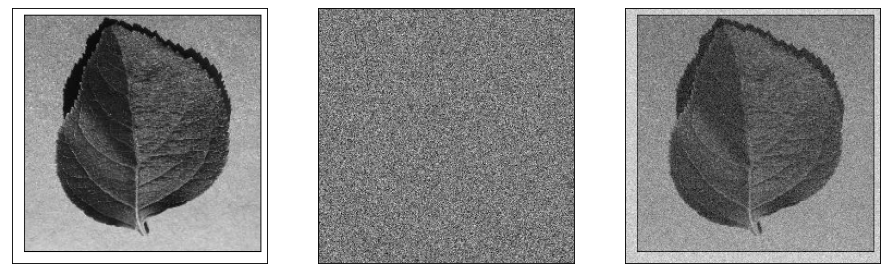

In [22]:
# Creating random normal (gaussian) noise with pre-defined mean and std.
# The noisy image should be the size of the reference image.
mean = 0
sigma = 20.0
gauss_noise = np.random.normal(mean, sigma, (ref.shape[0], ref.shape[1]))

# Convert RGB image to Grayscale image using cvtColor()
gray = cv2.cvtColor(ref, cv2.COLOR_BGR2GRAY)

# Add gaussian noise to the image
g_noisy = gray + gauss_noise # Gaussian noisy image

# Showing gray image, noise image, and noisy image
fig=plt.figure(figsize=(14, 14), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(131), plt.xticks([]), plt.yticks([])
plt.imshow(gray, cmap='gray'), plt.grid(False)
plt.subplot(132), plt.xticks([]), plt.yticks([])
plt.imshow(gauss_noise, cmap='gray'), plt.grid(False)
plt.subplot(133), plt.xticks([]), plt.yticks([])
plt.imshow(g_noisy, cmap='gray'), plt.grid(False)

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

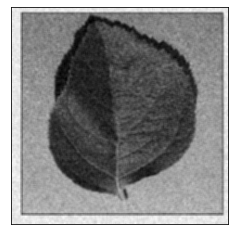

In [23]:
g_filtered = cv2.GaussianBlur(g_noisy, (3, 3), 20, 20)

# Display the result
plt.imshow(g_filtered, cmap='gray'), plt.grid(False)
plt.xticks([]), plt.yticks([])

[[0.33319442]
 [0.33361117]
 [0.33319442]]


(<matplotlib.image.AxesImage at 0x7f234af60cd0>, None)

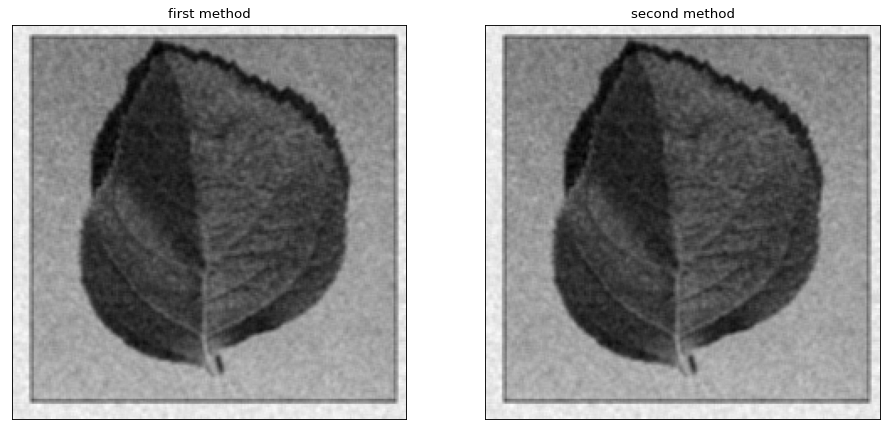

In [24]:
# Create a single gaussian kernel
g_kernel = cv2.getGaussianKernel(3, 20)
print(g_kernel)

# Apply two separate kernels over the image.
g_filtered_2 = cv2.sepFilter2D(g_noisy, -1, g_kernel, g_kernel)

# Displaying the results.
fig=plt.figure(figsize=(14, 14), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(121), plt.xticks([]), plt.yticks([]), plt.title('first method')
plt.imshow(g_filtered, cmap='gray'), plt.grid(False)
plt.subplot(122), plt.xticks([]), plt.yticks([]), plt.title('second method')
plt.imshow(g_filtered_2, cmap='gray'), plt.grid(False)